# Market Segmentation with Neural Networks
In this project, you will build a neural network model that can segment markets based on demographics, behavior, and other relevant factors. You will start by exploring a dataset of customer data, such as the Online Retail Dataset and performing EDA to gain insights into the data. Will analyze the correlation between different features and identify any outliers or missing values that need to be handled.

## Data Description

1. Title: Bank Marketing (with social/economic context)

2. Sources
   Created by: Sérgio Moro (ISCTE-IUL), Paulo Cortez (Univ. Minho) and Paulo Rita (ISCTE-IUL) @ 2014
   
3. Past Usage:

  The full dataset (bank-additional-full.csv) was described and analyzed in:

  S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems (2014), doi:10.1016/j.dss.2014.03.001.

4. Relevant Information:

   This dataset is based on "Bank Marketing" UCI dataset (please check the description at: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing).
   The data is enriched by the addition of five new social and economic features/attributes (national wide indicators from a ~10M population country), published by the Banco de Portugal and publicly available at: https://www.bportugal.pt/estatisticasweb.
   This dataset is almost identical to the one used in [Moro et al., 2014] (it does not include all attributes due to privacy concerns).
   Using the rminer package and R tool (http://cran.r-project.org/web/packages/rminer/), we found that the addition of the five new social and economic attributes (made available here) lead to substantial improvement in the prediction of a success, even when the duration of the call is not included. Note: the file can be read in R using: d=read.table("bank-additional-full.csv",header=TRUE,sep=";")
   
   The zip file includes two datasets:
      1) bank-additional-full.csv with all examples, ordered by date (from May 2008 to November 2010).
      2) bank-additional.csv with 10% of the examples (4119), randomly selected from bank-additional-full.csv.
   The smallest dataset is provided to test more computationally demanding machine learning algorithms (e.g., SVM).

   The binary classification goal is to predict if the client will subscribe a bank term deposit (variable y).

5. Number of Instances: 41188 for bank-additional-full.csv

6. Number of Attributes: 20 + output attribute.

7. Attribute information:

   For more information, read [Moro et al., 2014].

   ### Input variables:
   #### bank client data:
   
       1 - age (numeric)

       2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

       3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

       4 - education (categorical:"basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

       5 - default: has credit in default? (categorical: "no","yes","unknown")

       6 - housing: has housing loan? (categorical: "no","yes","unknown")

       7 - loan: has personal loan? (categorical: "no","yes","unknown")
   
   #### related with the last contact of the current campaign:
       8 - contact: contact communication type (categorical: "cellular","telephone")

       9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

       10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")

       11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
   #### other attributes:
   
       12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

       13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

       14 - previous: number of contacts performed before this campaign and for this client (numeric)

       15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
   #### social and economic context attributes
   
       16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

       17 - cons.price.idx: consumer price index - monthly indicator (numeric)     

       18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     

       19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

       20 - nr.employed: number of employees - quarterly indicator (numeric)

### Output variable (desired target):
  21 - y - has the client subscribed a term deposit? (binary: "yes","no")

__There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques.__


## Initial Import Libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix

## Loading Data

In [10]:
df=pd.read_csv('bank-additional-full.csv',delimiter=';')

In [11]:
df.rename(columns={'y': 'subscribed'}, inplace=True)

## Exploratory Data Analysis (EDA)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [13]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribed        0
dtype: int64

no null data. However it mentioned earlier having "unknown"

In [14]:
#replace "unknown" values with np.nan
df_null = df.replace("unknown", np.nan)

#count the number of missing values in each column
unknown_df = pd.DataFrame(df_null.isnull().sum())
unknown_df

,0
age,0
job,330
marital,80
education,1731
default,8597
housing,990
loan,990
contact,0
month,0
day_of_week,0


<BarContainer object of 21 artists>

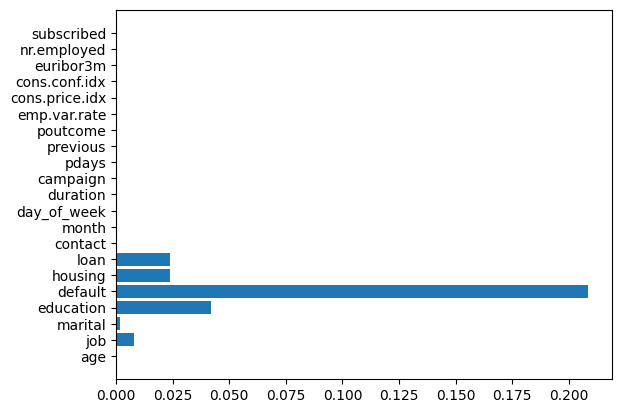

In [15]:
#get unknown percent
x = []
y =[]
for i in range(unknown_df.size):
    x.append(unknown_df.index[i])
    y.append(unknown_df[0][i]/41188)
#plt.xticks(rotation = 90)
plt.barh(x,y)

as seen above all data is less than 5% unknown which can be deleted but the default column actually reaches about 20% which is danger to remove so will do further analysis to percentages

<ipython-input-16-ee3a3717d3e3>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=90)
<ipython-input-16-ee3a3717d3e3>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=90)
<ipython-input-16-ee3a3717d3e3>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1,2].set_xticklabels(axes[1,2].get_xticklabels(), rotation=90)


[Text(0, 0, 'housemaid'),
 Text(1, 0, 'services'),
 Text(2, 0, 'admin.'),
 Text(3, 0, 'blue-collar'),
 Text(4, 0, 'technician'),
 Text(5, 0, 'retired'),
 Text(6, 0, 'management'),
 Text(7, 0, 'unemployed'),
 Text(8, 0, 'self-employed'),
 Text(9, 0, 'unknown'),
 Text(10, 0, 'entrepreneur'),
 Text(11, 0, 'student')]

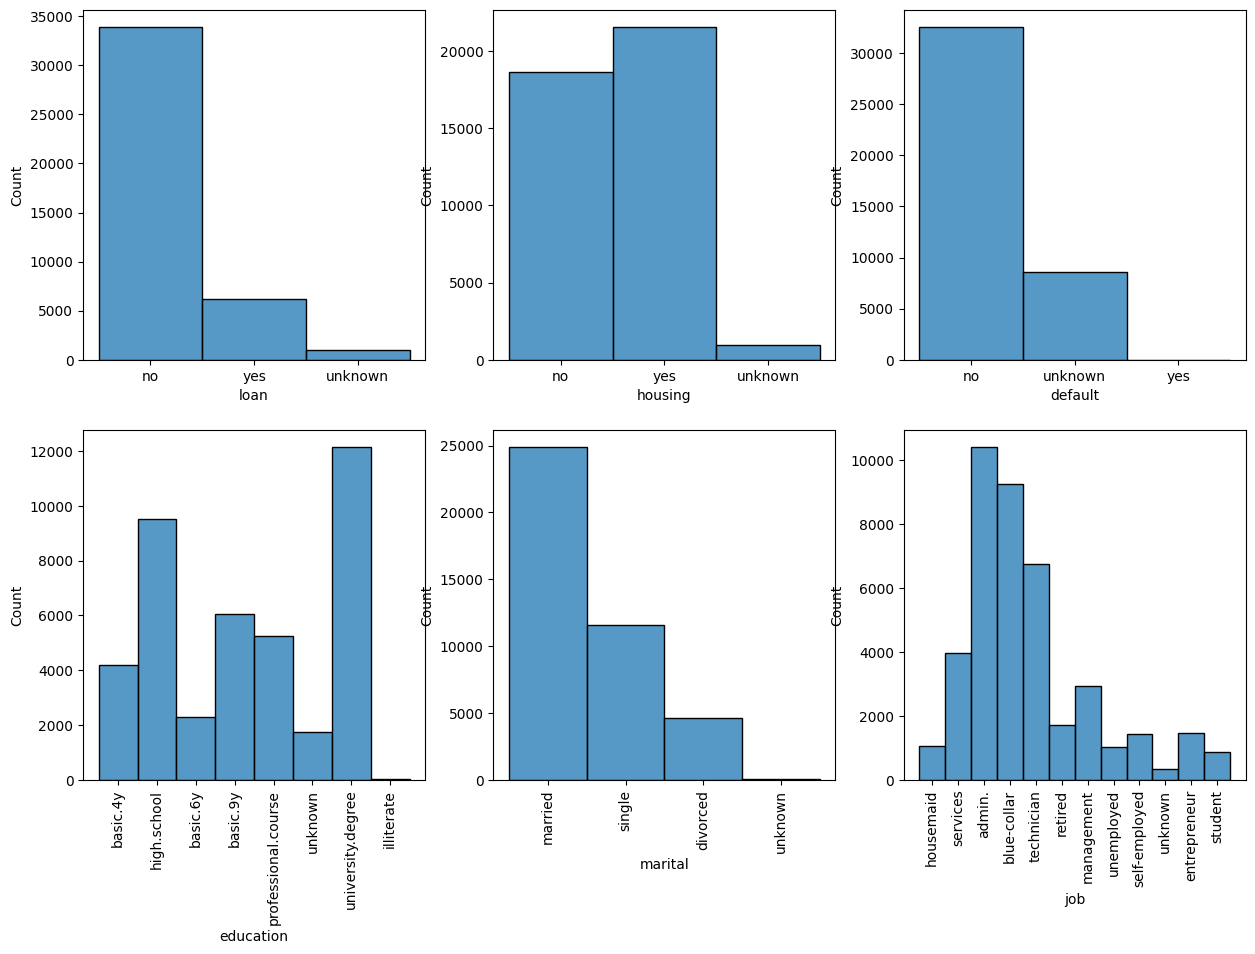

In [16]:
#get yes/no percent for each data
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
sns.histplot(data = df, x = 'loan', ax = axes[0,0])
sns.histplot(data = df, x = 'housing', ax = axes[0,1])
sns.histplot(data = df, x = 'default', ax = axes[0,2])
sns.histplot(data = df, x = 'education', ax = axes[1,0])
axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=90)
sns.histplot(data = df, x = 'marital', ax = axes[1,1])
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=90)

sns.histplot(data = df, x = 'job', ax = axes[1,2])
axes[1,2].set_xticklabels(axes[1,2].get_xticklabels(), rotation=90)



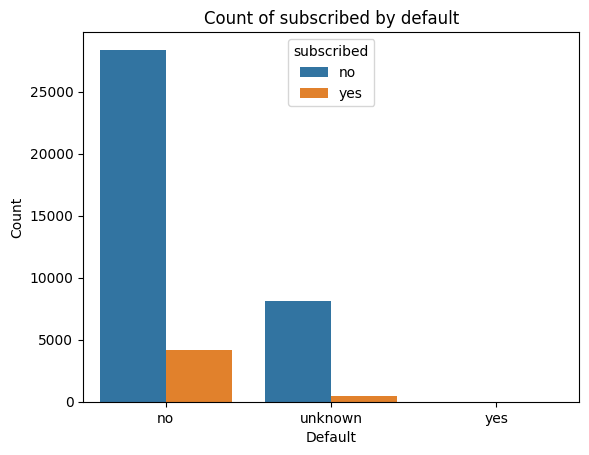

In [17]:
default_df = df.groupby(['default', 'subscribed']).size()
sns.barplot(x='default', y=0, hue='subscribed', data=default_df.reset_index())
plt.title('Count of subscribed by default')
plt.xlabel('Default')
plt.ylabel('Count')
plt.show()


the percentage of unknown in all is small as we can see except for default which seems to all be yes so we will delete default column as it seems to have not much effect on data and remove unknown in others

In [18]:
#delete default column
df_null = df_null.drop('default', axis =1)

#delete NA
df_null = df_null.dropna()


In [19]:
df_null

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


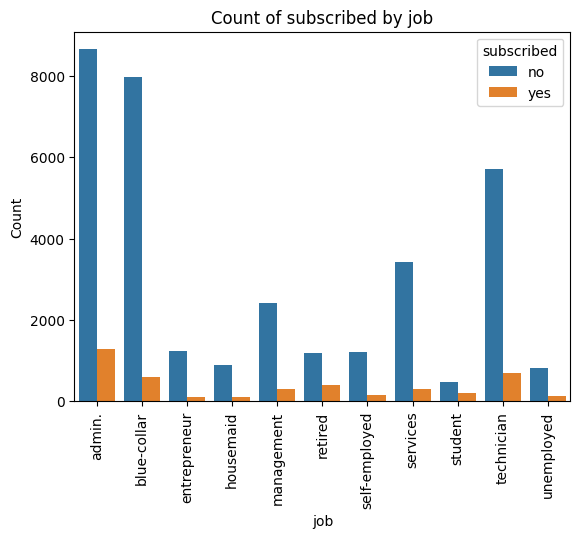

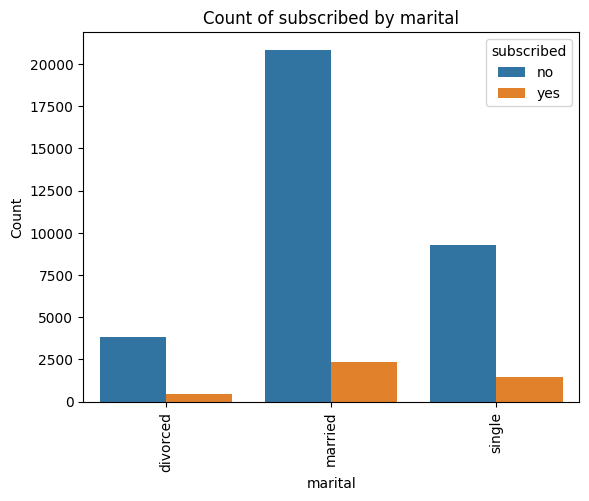

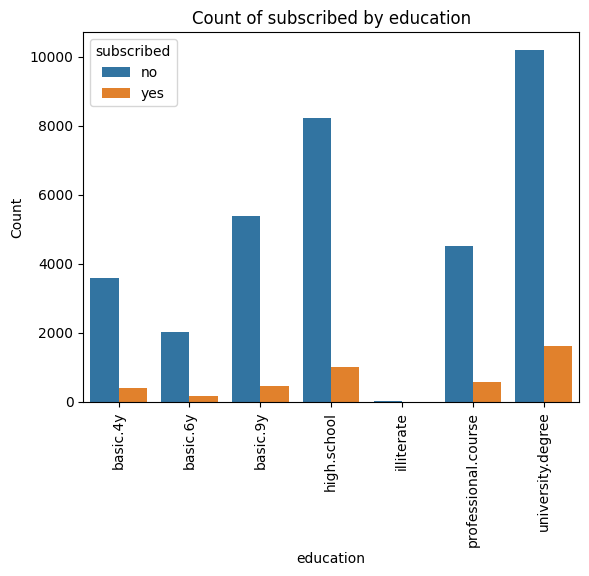

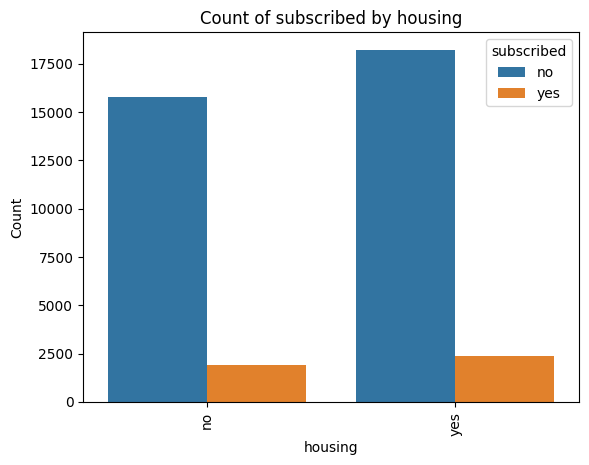

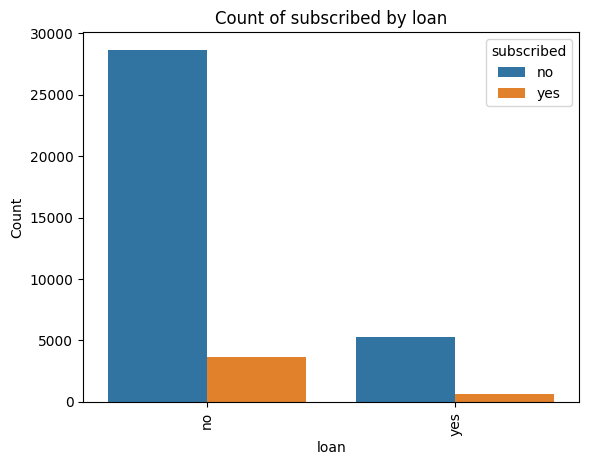

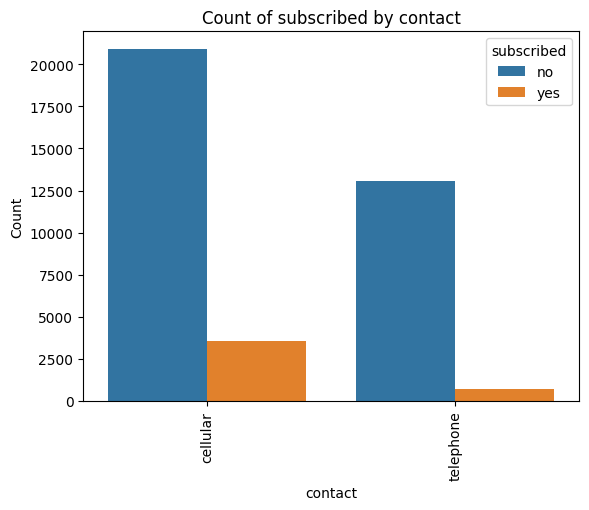

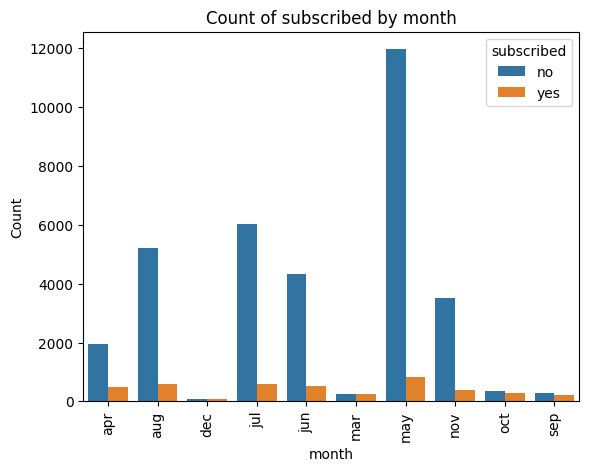

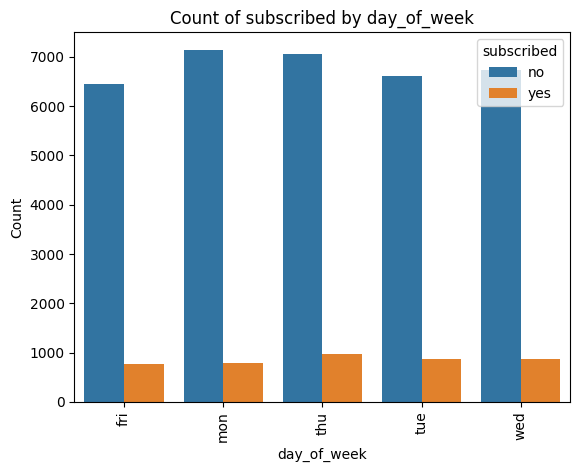

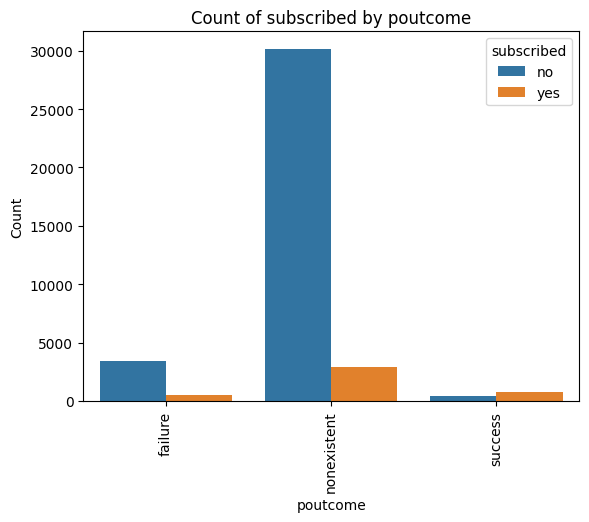

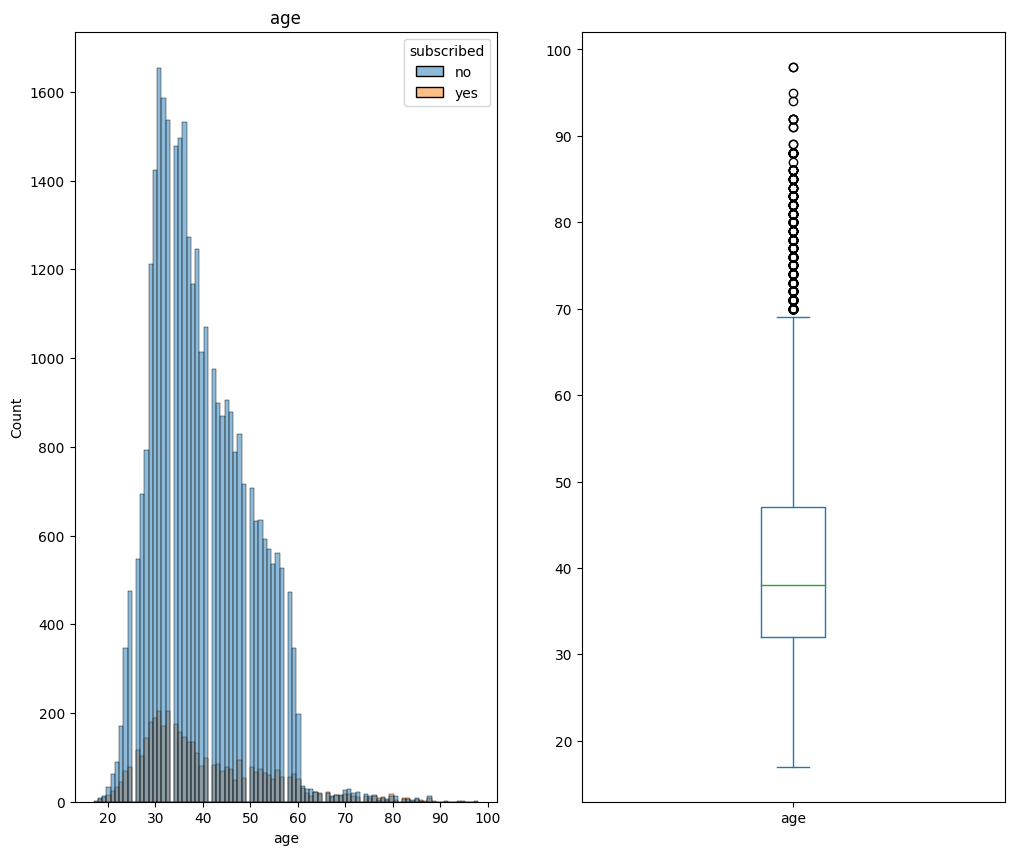

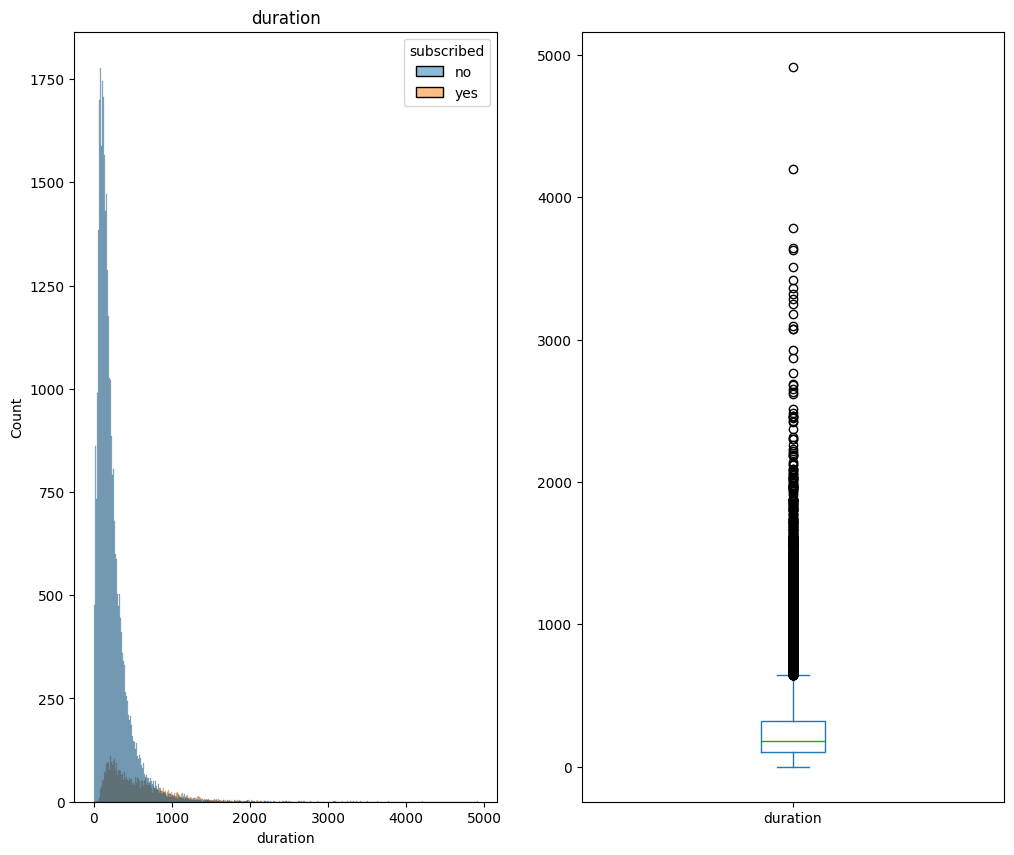

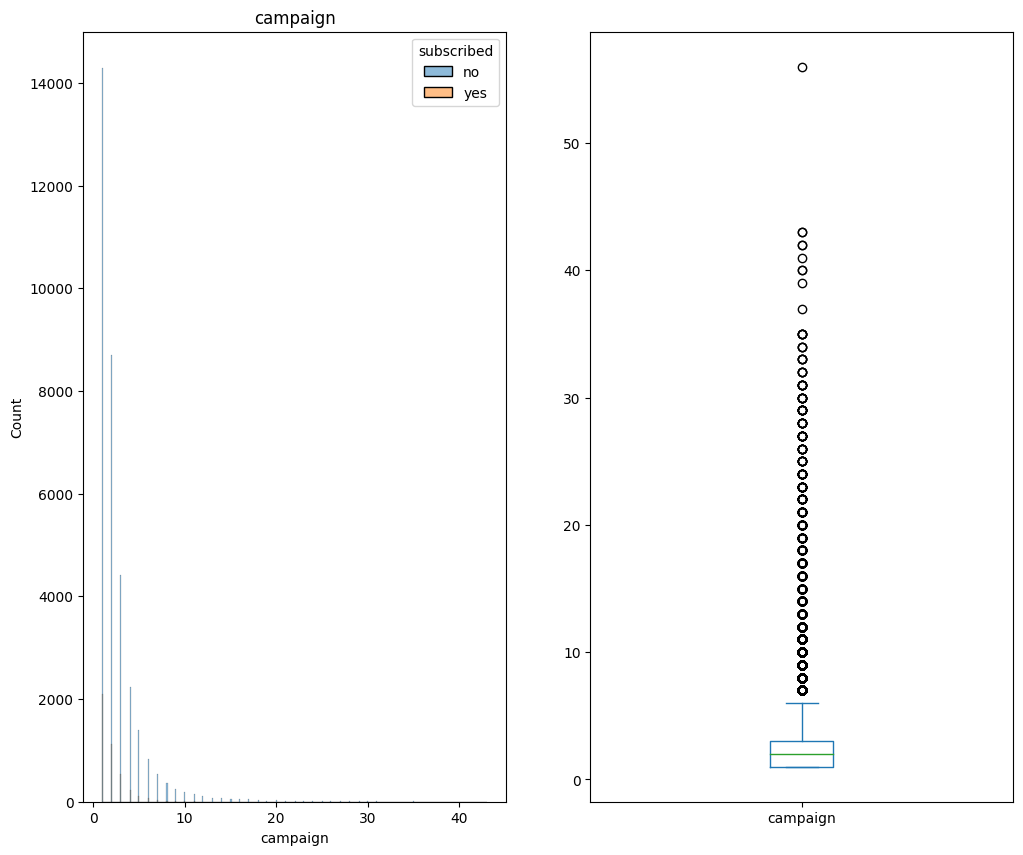

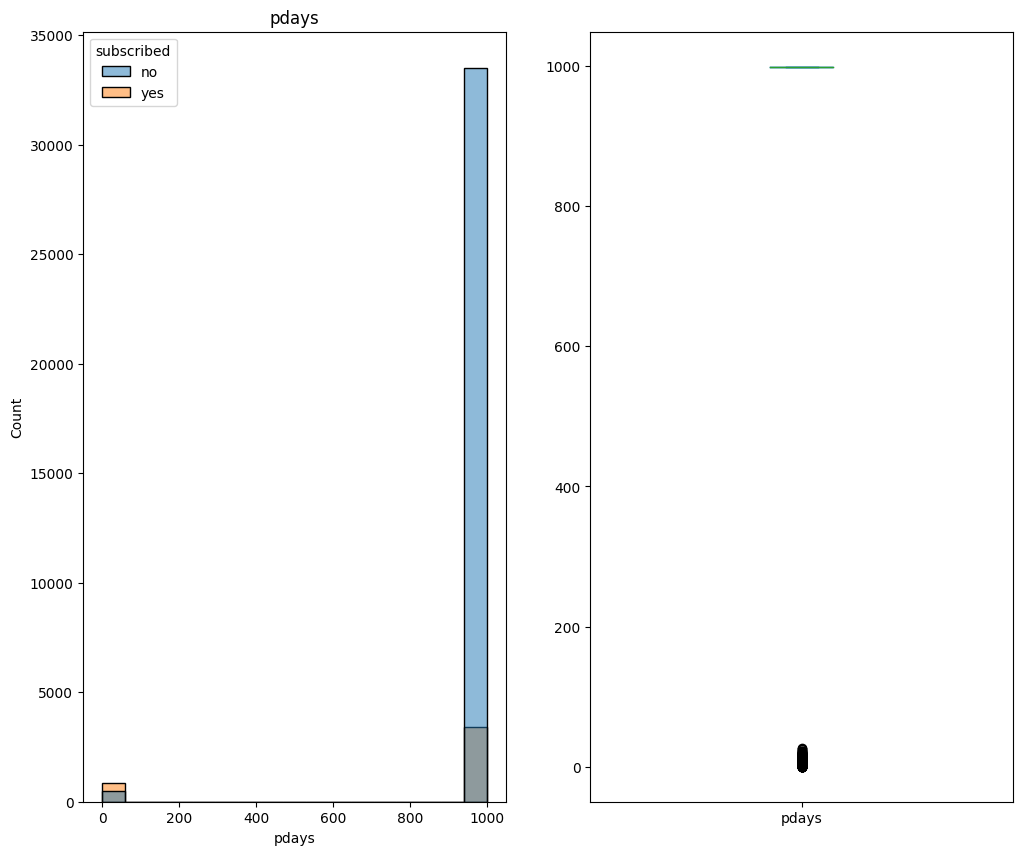

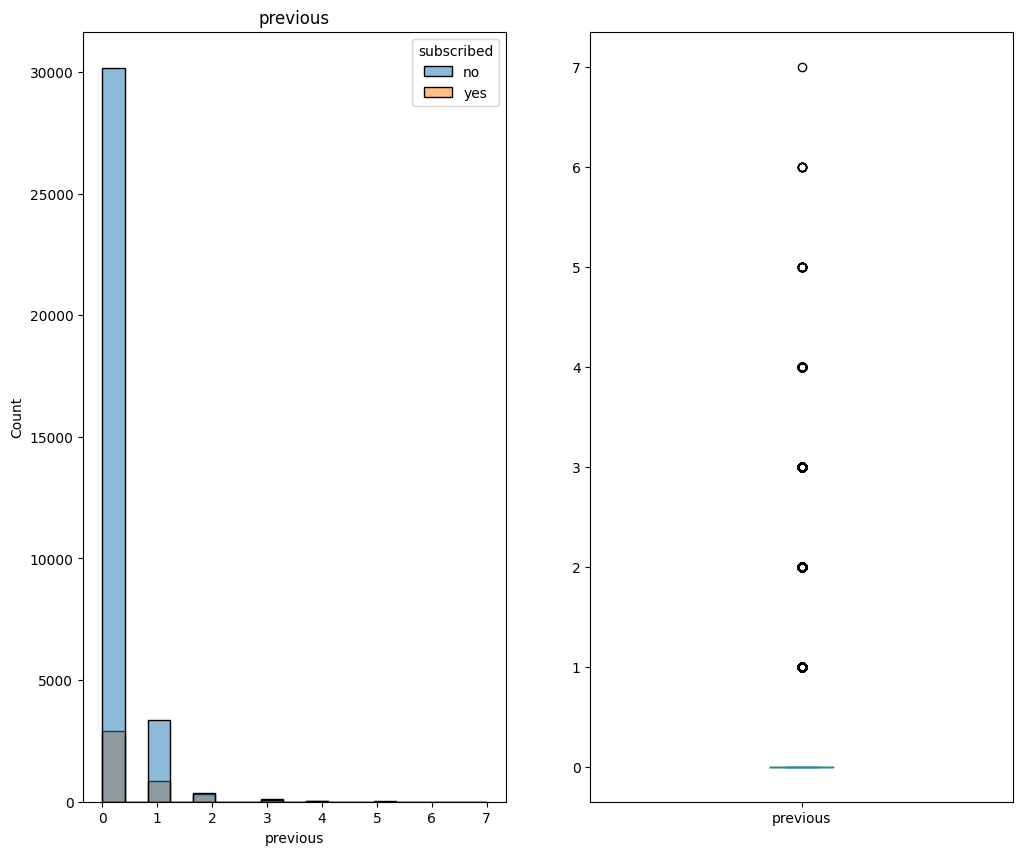

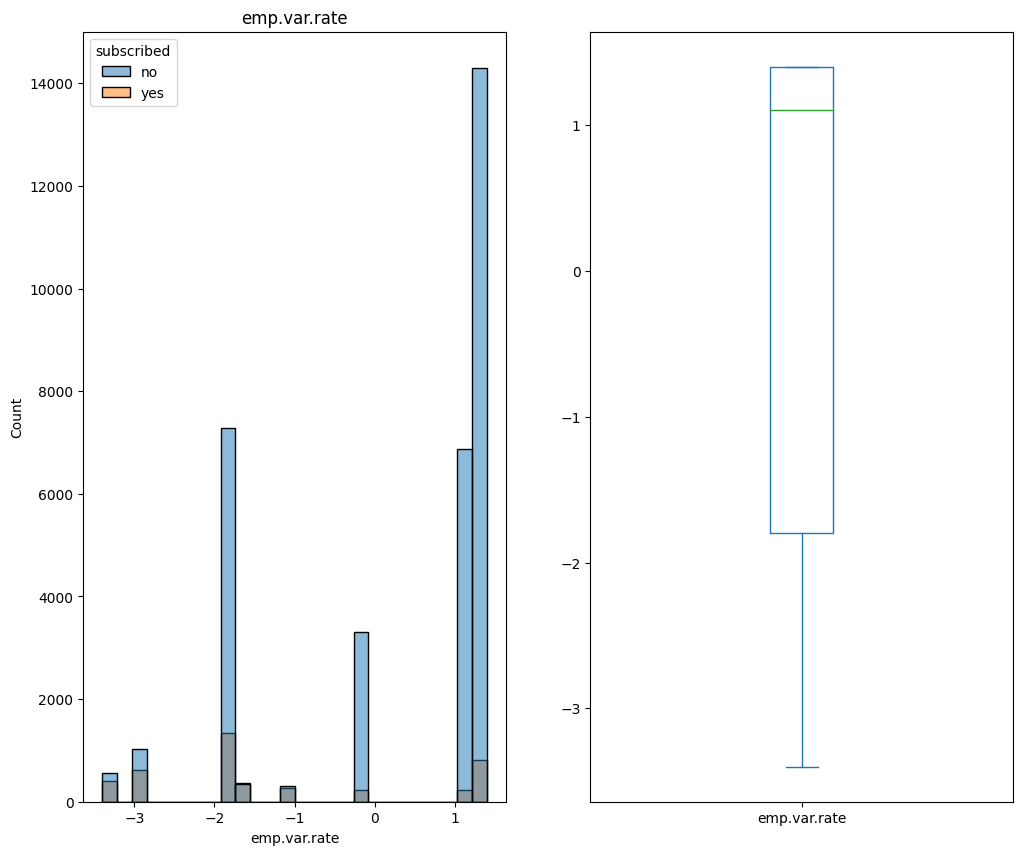

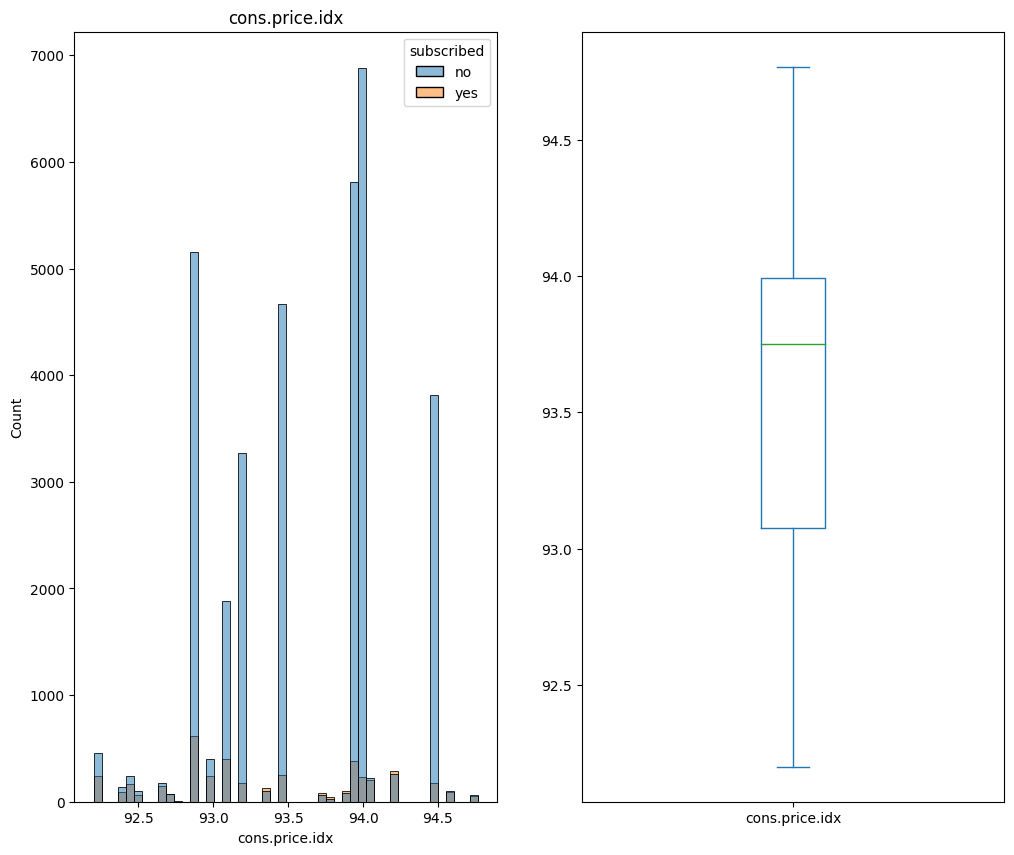

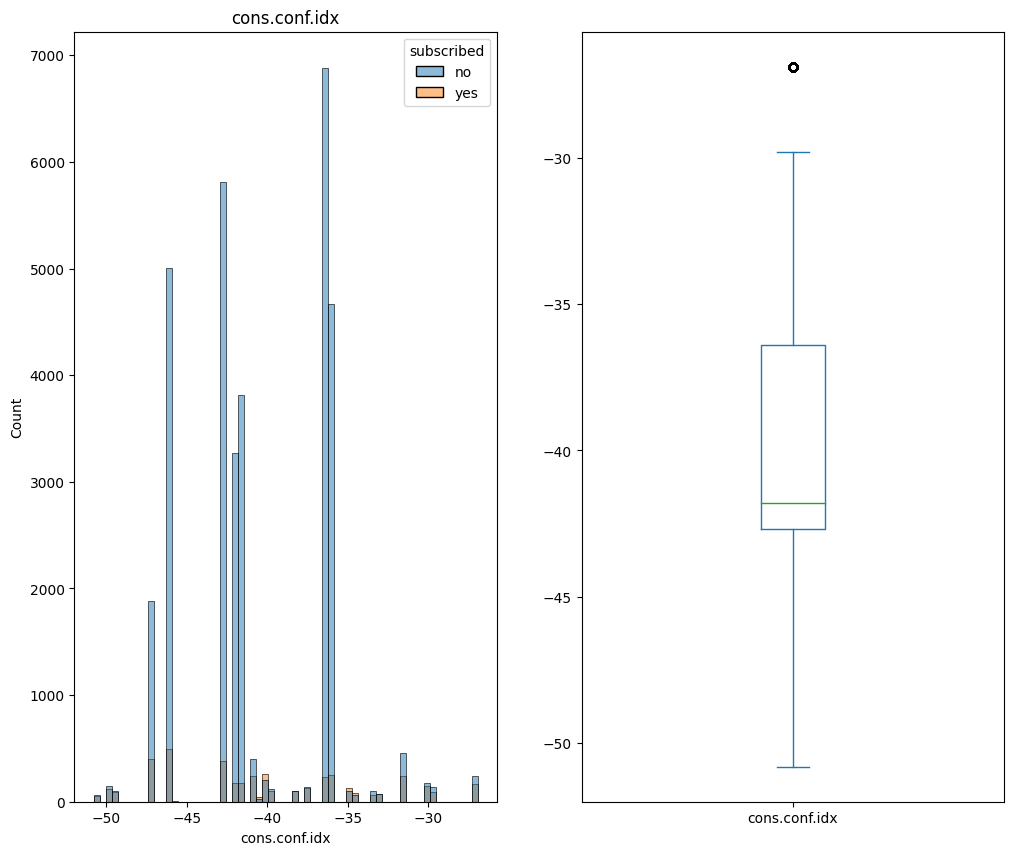

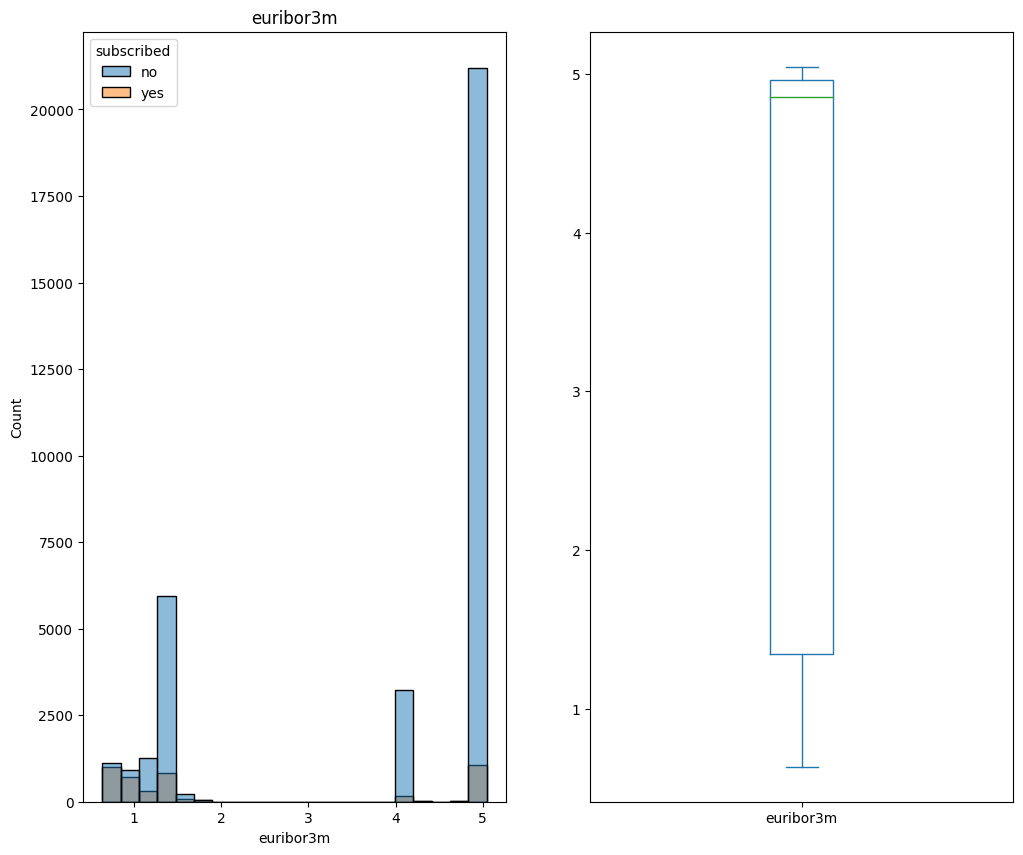

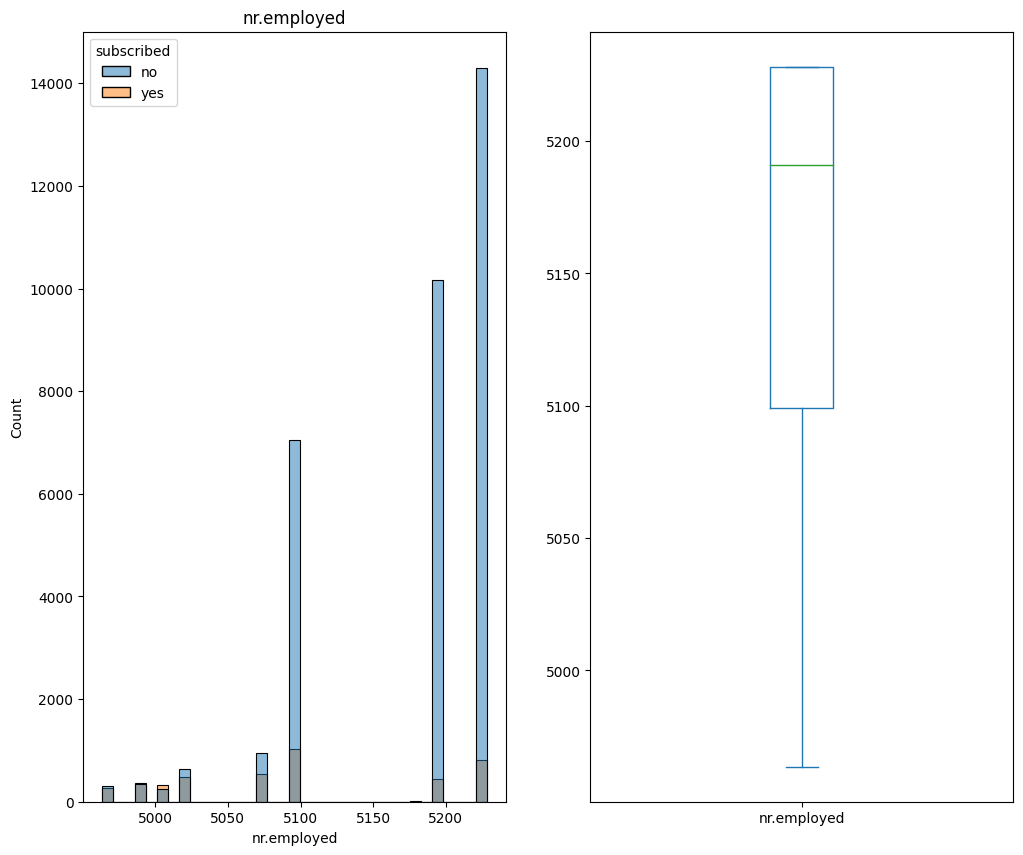

In [20]:
#create a plot to check each columns affect on decision
# Separate numerical and categorical columns
numerical_cols = df_null.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df_null.select_dtypes(include=['object', 'bool']).columns

for column in categorical_cols:
    if df_null[column].dtype == 'object' and (column != 'subscribed'):
        draw_df = df_null.groupby([column, 'subscribed']).size()
        sns.barplot(x=column, y=0, hue='subscribed', data=draw_df.reset_index())
        plt.title('Count of subscribed by '+ column)
        plt.xlabel(column)
        plt.xticks(rotation = 90)
        plt.ylabel('Count')
        plt.show()

# Plot histograms + box plots for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(12, 10))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data = df_null, x = col, hue = 'subscribed')
    #df[col].hist(bins=30)
    plt.title(col)

    # Box plot
    plt.subplot(1, 2, 2)
    df[col].plot(kind='box')

    plt.show()


- from above data we can see that some features like (nr. employes - 5050 value makes yes appear more) , (euribor <-1) ,  pdays <200 all contribute more to yes decision
- However, This data shows visible bias towards no as an answer

<ipython-input-21-a66468cf0e8f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_null.corr()


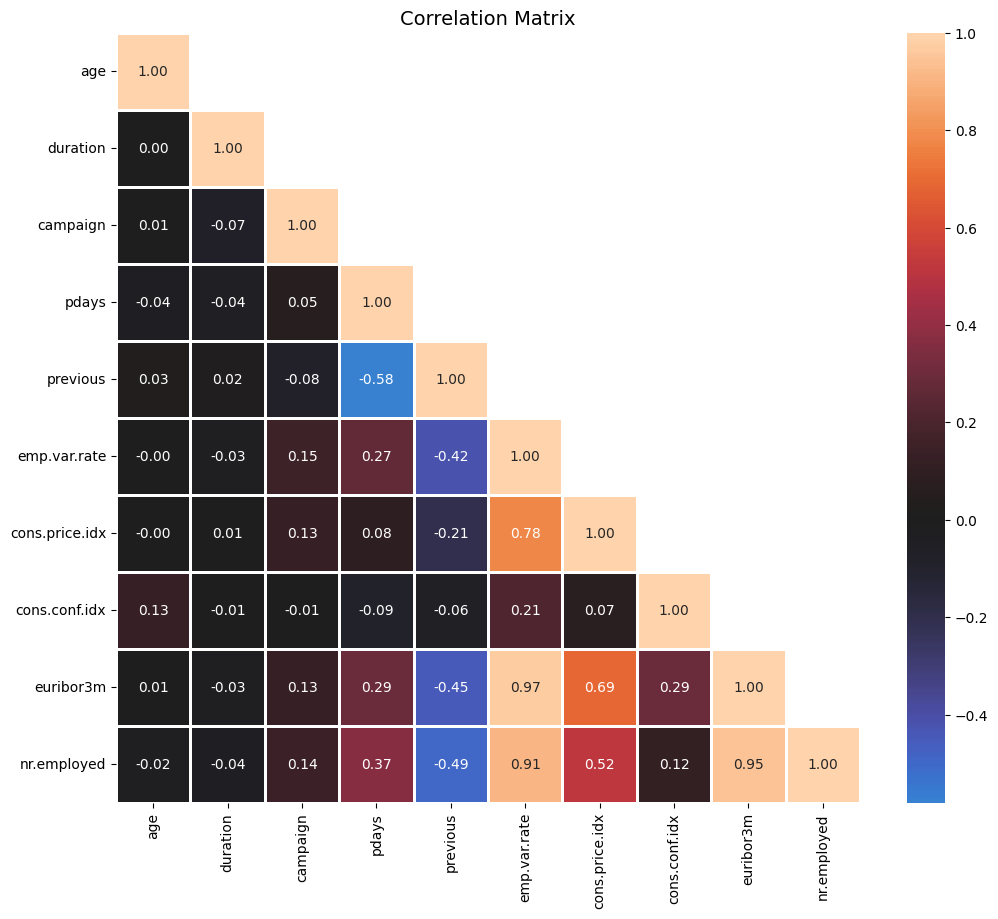

In [21]:
# Calculate the correlation matrix excluding the 'CustomerID' column
corr = df_null.corr()

# Define a custom colormap
#my_cmap = LinearSegmentedColormap.from_list('custom_map', colors, N=256)

# Create a mask to only show the lower triangle of the matrix (since it's mirrored around its
# top-left to bottom-right diagonal)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask = mask, annot=True, center=0, fmt='.2f', linewidths=2)
plt.title('Correlation Matrix', fontsize=14)
plt.show()

In [22]:
#we can remove nr.employed and emp.var.rate keeping euibor3m as all correlated
del df_null['nr.employed']
del df_null['emp.var.rate']


## More Feature Engineering & Data Preprocessing

### Handle Categorical data

In [23]:
df_cat=pd.get_dummies(df_null,drop_first=True)#applying One-Hot Encoding
df_cat.head(5)

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,job_blue-collar,job_entrepreneur,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,subscribed_yes
0,56,261,1,999,0,93.994,-36.4,4.857,0,0,...,0,0,0,1,0,0,0,1,0,0
1,57,149,1,999,0,93.994,-36.4,4.857,0,0,...,0,0,0,1,0,0,0,1,0,0
2,37,226,1,999,0,93.994,-36.4,4.857,0,0,...,0,0,0,1,0,0,0,1,0,0
3,40,151,1,999,0,93.994,-36.4,4.857,0,0,...,0,0,0,1,0,0,0,1,0,0
4,56,307,1,999,0,93.994,-36.4,4.857,0,0,...,0,0,0,1,0,0,0,1,0,0


<Axes: xlabel='pdays', ylabel='Count'>

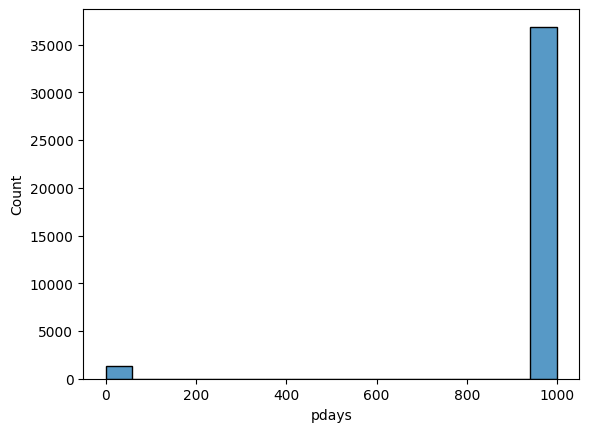

In [24]:
sns.histplot(data = df_cat, x = 'pdays')

 ### Outlier Detection and Treatment

Given the multi-dimensional nature of the data, it would be prudent to use algorithms that can detect outliers in multi-dimensional spaces. I am going to use the __Isolation Forest__ algorithm for this task. It isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.



In [25]:
from sklearn.ensemble import IsolationForest

# Initializing the IsolationForest model with a contamination parameter of 0.05
model = IsolationForest(contamination=0.05, random_state=0)

# Fitting the model on our dataset (converting DataFrame to NumPy to avoid warning)
df_cat['Outlier_Scores'] = model.fit_predict(df_cat.iloc[:, 1:].to_numpy())

# Creating a new column to identify outliers (1 for inliers and -1 for outliers)
df_cat['Is_Outlier'] = [1 if x == -1 else 0 for x in df_cat['Outlier_Scores']]

# Display the first few rows of the customer_data dataframe
df_cat.head()

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,job_blue-collar,job_entrepreneur,...,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,subscribed_yes,Outlier_Scores,Is_Outlier
0,56,261,1,999,0,93.994,-36.4,4.857,0,0,...,0,1,0,0,0,1,0,0,1,0
1,57,149,1,999,0,93.994,-36.4,4.857,0,0,...,0,1,0,0,0,1,0,0,1,0
2,37,226,1,999,0,93.994,-36.4,4.857,0,0,...,0,1,0,0,0,1,0,0,1,0
3,40,151,1,999,0,93.994,-36.4,4.857,0,0,...,0,1,0,0,0,1,0,0,1,0
4,56,307,1,999,0,93.994,-36.4,4.857,0,0,...,0,1,0,0,0,1,0,0,1,0


visualize the distribution of these scores and the number of inliers and outliers detected by the model:

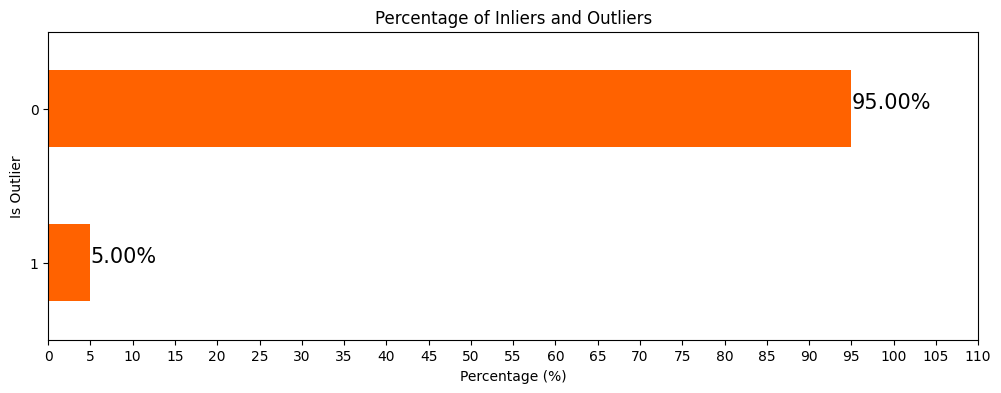

In [26]:
# Calculate the percentage of inliers and outliers
outlier_percentage = df_cat['Is_Outlier'].value_counts(normalize=True) * 100

# Plotting the percentage of inliers and outliers
plt.figure(figsize=(12, 4))
outlier_percentage.plot(kind='barh', color='#ff6200')

# Adding the percentage labels on the bars
for index, value in enumerate(outlier_percentage):
    plt.text(value, index, f'{value:.2f}%', fontsize=15)

plt.title('Percentage of Inliers and Outliers')
plt.xticks(ticks=np.arange(0, 115, 5))
plt.xlabel('Percentage (%)')
plt.ylabel('Is Outlier')
plt.gca().invert_yaxis()
plt.show()

having few percentage of outliners means algorith worked good
acting upon now

In [27]:
# Remove the outliers from the main dataset
df_cat_cleaned = df_cat[df_cat['Is_Outlier'] == 0]

# Drop the 'Outlier_Scores' and 'Is_Outlier' columns
df_cat_cleaned = df_cat_cleaned.drop(columns=['Outlier_Scores', 'Is_Outlier'])

# Reset the index of the cleaned data
df_cat_cleaned.reset_index(drop=True, inplace=True)

In [28]:
# Getting the number of rows in the cleaned customer dataset
df_cat_cleaned.shape[0]

36332

### Splitting X,y

In [29]:
x=df_cat_cleaned.drop(['subscribed_yes'],axis=1)
y=df_cat_cleaned['subscribed_yes']

df_cat_cleaned

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,job_blue-collar,job_entrepreneur,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,subscribed_yes
0,56,261,1,999,0,93.994,-36.4,4.857,0,0,...,0,0,0,1,0,0,0,1,0,0
1,57,149,1,999,0,93.994,-36.4,4.857,0,0,...,0,0,0,1,0,0,0,1,0,0
2,37,226,1,999,0,93.994,-36.4,4.857,0,0,...,0,0,0,1,0,0,0,1,0,0
3,40,151,1,999,0,93.994,-36.4,4.857,0,0,...,0,0,0,1,0,0,0,1,0,0
4,56,307,1,999,0,93.994,-36.4,4.857,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36327,73,334,1,999,0,94.767,-50.8,1.028,0,0,...,1,0,0,0,0,0,0,1,0,1
36328,46,383,1,999,0,94.767,-50.8,1.028,1,0,...,1,0,0,0,0,0,0,1,0,0
36329,56,189,2,999,0,94.767,-50.8,1.028,0,0,...,1,0,0,0,0,0,0,1,0,0
36330,44,442,1,999,0,94.767,-50.8,1.028,0,0,...,1,0,0,0,0,0,0,1,0,1


### Adjusting sample BIAS

In [30]:
from imblearn.over_sampling import SMOTE

In [31]:
sm = SMOTE(sampling_strategy='auto', random_state=42)

In [32]:
# Convert dataframes to numpy arrays
x_array = pd.DataFrame(x).to_numpy()
y_array = pd.DataFrame(y).to_numpy()

# Reshape arrays to 2D
y_array = y_array.reshape (-1, 1) # if y has a single feature

In [33]:
X,Y=sm.fit_resample(x_array,y_array)

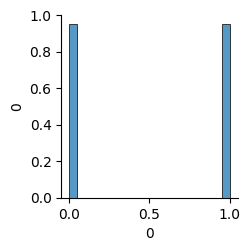

In [34]:
sns.pairplot(data = pd.DataFrame(Y) )

### Feature Scalling

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
sc=StandardScaler()
X_Scaled=sc.fit_transform(X)

In [37]:
pd.DataFrame(X_Scaled)

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,1.486854,-0.414171,-0.598736,0.070763,-0.344505,0.912095,0.923296,0.911997,-0.540148,-0.208614,...,1.638892,-0.346381,-0.159136,-0.143763,2.160717,-0.570458,-0.521969,-0.545095,0.360691,-0.067301
1,1.579440,-0.711786,-0.598736,0.070763,-0.344505,0.912095,0.923296,0.911997,-0.540148,-0.208614,...,1.638892,-0.346381,-0.159136,-0.143763,2.160717,-0.570458,-0.521969,-0.545095,0.360691,-0.067301
2,-0.272268,-0.507175,-0.598736,0.070763,-0.344505,0.912095,0.923296,0.911997,-0.540148,-0.208614,...,1.638892,-0.346381,-0.159136,-0.143763,2.160717,-0.570458,-0.521969,-0.545095,0.360691,-0.067301
3,0.005488,-0.706472,-0.598736,0.070763,-0.344505,0.912095,0.923296,0.911997,-0.540148,-0.208614,...,1.638892,-0.346381,-0.159136,-0.143763,2.160717,-0.570458,-0.521969,-0.545095,0.360691,-0.067301
4,1.486854,-0.291935,-0.598736,0.070763,-0.344505,0.912095,0.923296,0.911997,-0.540148,-0.208614,...,1.638892,-0.346381,-0.159136,-0.143763,2.160717,-0.570458,-0.521969,-0.545095,0.360691,-0.067301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66629,1.021536,-0.380397,0.436218,0.070763,0.723664,-0.208509,1.259465,-1.474392,0.367958,-0.208614,...,-0.687209,-0.346381,-0.159136,-0.143763,0.381841,-0.570458,-0.521969,1.236911,-0.863665,-0.067301
66630,0.253701,1.333621,-0.273402,0.070763,-0.344505,0.811779,-0.051161,0.954976,-0.540148,-0.208614,...,-0.073540,-0.346381,-0.159136,-0.143763,1.447554,-0.570458,0.206789,-0.545095,0.360691,-0.067301
66631,1.579440,1.144824,-0.018575,0.070763,-0.344505,-0.320074,0.289171,0.672297,-0.540148,-0.208614,...,-0.687209,1.731708,-0.159136,-0.143763,-0.542511,-0.570458,-0.521969,0.639935,0.360691,-0.067301
66632,1.232901,1.041186,-0.459853,0.070763,-0.344505,-0.211525,0.596748,0.805445,1.280949,-0.208614,...,-0.687209,0.814881,-0.159136,-0.143763,-0.542511,-0.570458,-0.521969,-0.545095,0.360691,-0.067301


## Splitting Data

In [38]:

Y.size

66634

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.25,stratify=Y,random_state=0)

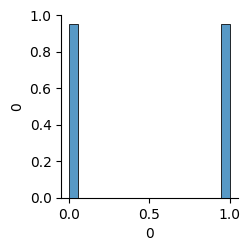

In [40]:
sns.pairplot(data = pd.DataFrame(y_train))

## Build and Train the Neural Network Model

In [47]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Import EarlyStopping
from keras.callbacks import EarlyStopping
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Instantiate EarlyStopping
es = EarlyStopping(monitor='val_loss', # monitor validation loss
                   patience=30, # number of epochs with no improvement after which training will be stopped
                   restore_best_weights=True) # restore model weights from the epoch with the best value of the monitored quantity

# Train the model with EarlyStopping
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[es])


Epoch 1/100
1562/1562 [==============================] - 6s 3ms/step - loss: 0.2797 - accuracy: 0.8903 - val_loss: 0.2355 - val_accuracy: 0.9120
Epoch 2/100
1562/1562 [==============================] - 4s 3ms/step - loss: 0.1958 - accuracy: 0.9238 - val_loss: 0.1867 - val_accuracy: 0.9263
Epoch 3/100
1562/1562 [==============================] - 4s 3ms/step - loss: 0.1623 - accuracy: 0.9360 - val_loss: 0.1648 - val_accuracy: 0.9347
Epoch 4/100
1562/1562 [==============================] - 4s 3ms/step - loss: 0.1440 - accuracy: 0.9417 - val_loss: 0.1558 - val_accuracy: 0.9379
Epoch 5/100
1562/1562 [==============================] - 4s 3ms/step - loss: 0.1306 - accuracy: 0.9466 - val_loss: 0.1445 - val_accuracy: 0.9418
Epoch 6/100
1562/1562 [==============================] - 4s 3ms/step - loss: 0.1193 - accuracy: 0.9512 - val_loss: 0.1405 - val_accuracy: 0.9417
Epoch 7/100
1562/1562 [==============================] - 4s 3ms/step - loss: 0.1117 - accuracy: 0.9547 - val_loss: 0.1438 - val_ac

## Evaluate Model

In [48]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

521/521 [==============================] - 1s 2ms/step - loss: 0.1257 - accuracy: 0.9495
Test Accuracy: 94.95%


521/521 [==============================] - 2s 3ms/step


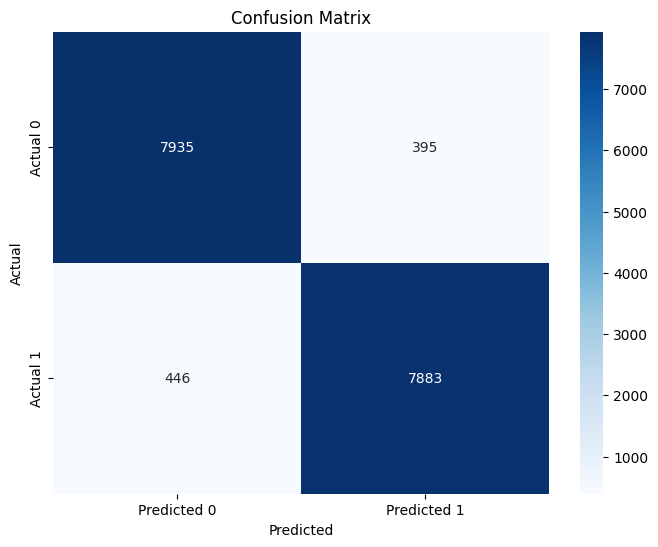

In [49]:
# Generate predictions using the trained model
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The Model Seems to be performing well on data however more optimization can be done later for the model
